In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as mtick
import numpy as np

from plot_helpers import sup_label, load_streams

# customizations
rcParams['axes.autolimit_mode'] = 'round_numbers'
rcParams['axes.labelsize'] = 'large'
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams['axes.axisbelow'] = True
rcParams['font.family'] = 'serif'
rcParams['pdf.use14corefonts'] = True
rcParams['savefig.bbox'] = 'tight'
rcParams['font.size'] = 12.0
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

plt.style.use('tableau-colorblind10')

In [2]:
openmc_streams, time = load_streams('openmc_results/saltproc_runtime')
serpent_streams, _ = load_streams('serpent_results/saltproc_runtime')

In [3]:
def plot_feed_nuc(stream, nuc, i=0, j=-1):
    nucname = sup_label(nuc)
    tm = time[i:j]
    omc_nuc = np.array(openmc_streams[stream][nuc])[i:j]
    spn_nuc = np.array(serpent_streams[stream][nuc])[i:j]
    fig1, ax1 = plt.subplots()
    ax1.plot(tm, spn_nuc, label='Serpent2')
    ax1.plot(tm, omc_nuc, label='OpenMC')
    
    ax1.grid()
    ax1.set_ylabel(f'{nucname} feed mass [g]')
    ax1.set_xlabel('Days')
    ax1.legend()
    
    fig2, ax2 = plt.subplots()
    err = (omc_nuc - spn_nuc)# / spn_nuc
    for k in range(len(err)):
        if np.isnan(err[k]):
            if k == 0:
                err[k] = 0
            else:
                err[k] = err[k-1]
    ax2.plot(tm, err)
    ax2.grid()
    ax2.set_ylabel(f'{nucname} feed OpenMC - Serpent [g]')
    ax2.set_xlabel('Days')
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, 2))
    
    return fig1, fig2

In [4]:
openmc_streams.keys()

dict_keys(['feed_fuel_salt', 'waste_gas_separator', 'waste_nickel_filter', 'waste_reductive_extractor'])

In [5]:
len(openmc_streams['feed_fuel_salt']['Th232'])

122

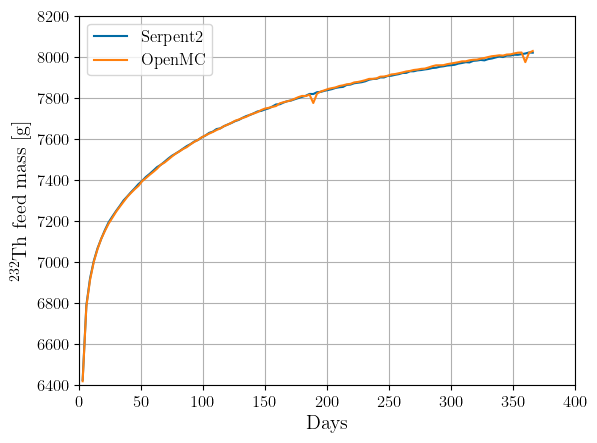

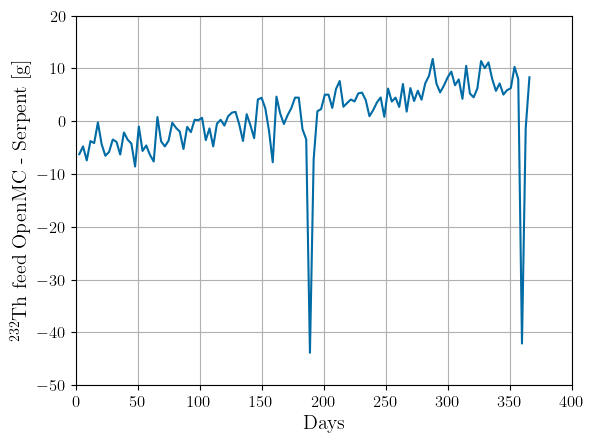

In [6]:
fig1, fig2 = plot_feed_nuc('feed_fuel_salt', 'Th232', j=122)

In [7]:
fig1.savefig('../figs/ch5/th232_feed_mass.pdf')
fig2.savefig('../figs/ch5/th232_feed_mass_diff.pdf')